In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt  # Importing the built-in libraries
import seaborn as sb
%matplotlib inline

In [3]:
df=pd.read_csv("Information.csv",engine='python')    # Reading the dataframe
df.head(5)

,_unit_id,_golden,_unit_state,_trusted_judgments,_last_judgment_at,gender,gender:confidence,profile_yn,profile_yn:confidence,created,...,profileimage,retweet_count,sidebar_color,text,tweet_coord,tweet_count,tweet_created,tweet_id,tweet_location,user_timezone
0,815719226,False,finalized,3,10/26/15 23:24,male,1.0000,yes,1.0,12/5/13 1:48,...,https://pbs.twimg.com/profile_images/414342229...,0,FFFFFF,Robbie E Responds To Critics After Win Against...,NaN,110964,10/26/15 12:40,6.587300e+17,main; @Kan1shk3,Chennai
1,815719227,False,finalized,3,10/26/15 23:30,male,1.0000,yes,1.0,10/1/12 13:51,...,https://pbs.twimg.com/profile_images/539604221...,0,C0DEED,‰ÛÏIt felt like they were my friends and I was...,NaN,7471,10/26/15 12:40,6.587300e+17,NaN,Eastern Time (US & Canada)
2,815719228,False,finalized,3,10/26/15 23:33,male,0.6625,yes,1.0,11/28/14 11:30,...,https://pbs.twimg.com/profile_images/657330418...,1,C0DEED,i absolutely adore when louis starts the songs...,NaN,5617,10/26/15 12:40,6.587300e+17,clcncl,Belgrade
3,815719229,False,finalized,3,10/26/15 23:10,male,1.0000,yes,1.0,6/11/09 22:39,...,https://pbs.twimg.com/profile_images/259703936...,0,C0DEED,Hi @JordanSpieth - Looking at the url - do you...,NaN,1693,10/26/15 12:40,6.587300e+17,"Palo Alto, CA",Pacific Time (US & Canada)
4,815719230,False,finalized,3,10/27/15 1:15,female,1.0000,yes,1.0,4/16/14 13:23,...,https://pbs.twimg.com/profile_images/564094871...,0,0,Watching Neighbours on Sky+ catching up with t...,NaN,31462,10/26/15 12:40,6.587300e+17,NaN,NaN


In [4]:
#To find duplicates
df.duplicated().sum()

0

In [5]:
df.columns

Index(['_unit_id', '_golden', '_unit_state', '_trusted_judgments',
       '_last_judgment_at', 'gender', 'gender:confidence', 'profile_yn',
       'profile_yn:confidence', 'created', 'description', 'fav_number',
       'gender_gold', 'link_color', 'name', 'profile_yn_gold', 'profileimage',
       'retweet_count', 'sidebar_color', 'text', 'tweet_coord', 'tweet_count',
       'tweet_created', 'tweet_id', 'tweet_location', 'user_timezone'],
      dtype='object')

In [6]:
#Drop unrequired columns
df.drop(columns=['_unit_id', '_golden', '_unit_state', '_trusted_judgments',
       '_last_judgment_at',  'profile_yn','profile_yn:confidence', 
        'created', 'fav_number','gender_gold', 'link_color',
        'profile_yn_gold', 'profileimage','retweet_count', 'sidebar_color',  'tweet_coord', 
        'tweet_count','tweet_created', 'tweet_id','tweet_location','user_timezone'],
        inplace=True,axis=1)
df.head(5)

,gender,gender:confidence,description,name,text
0,male,1.0000,i sing my own rhythm.,sheezy0,Robbie E Responds To Critics After Win Against...
1,male,1.0000,I'm the author of novels filled with family dr...,DavdBurnett,‰ÛÏIt felt like they were my friends and I was...
2,male,0.6625,louis whining and squealing and all,lwtprettylaugh,i absolutely adore when louis starts the songs...
3,male,1.0000,"Mobile guy. 49ers, Shazam, Google, Kleiner Pe...",douggarland,Hi @JordanSpieth - Looking at the url - do you...
4,female,1.0000,Ricky Wilson The Best FRONTMAN/Kaiser Chiefs T...,WilfordGemma,Watching Neighbours on Sky+ catching up with t...


In [7]:
#Null values
df.isnull().sum() 

gender                 97
gender:confidence      26
description          3744
name                    0
text                    0
dtype: int64

In [8]:
#Dropping null values
df.dropna(subset=['gender'],inplace=True)

In [9]:
df.isnull().sum()

gender                  0
gender:confidence       0
description          3729
name                    0
text                    0
dtype: int64

In [10]:
df['description']=df.description.fillna("None")

In [11]:
df.isnull().sum()

gender               0
gender:confidence    0
description          0
name                 0
text                 0
dtype: int64

In [12]:
#finding out the rows which are most confident about gender
df=df[df['gender:confidence']==1] 

In [13]:
df.drop(columns=['gender:confidence'],inplace=True,axis=1)

In [14]:
df.shape

(13926, 4)

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 13926 entries, 0 to 20049
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   gender       13926 non-null  object
 1   description  13926 non-null  object
 2   name         13926 non-null  object
 3   text         13926 non-null  object
dtypes: object(4)
memory usage: 544.0+ KB


Text(0, 0.5, 'Number of Members')

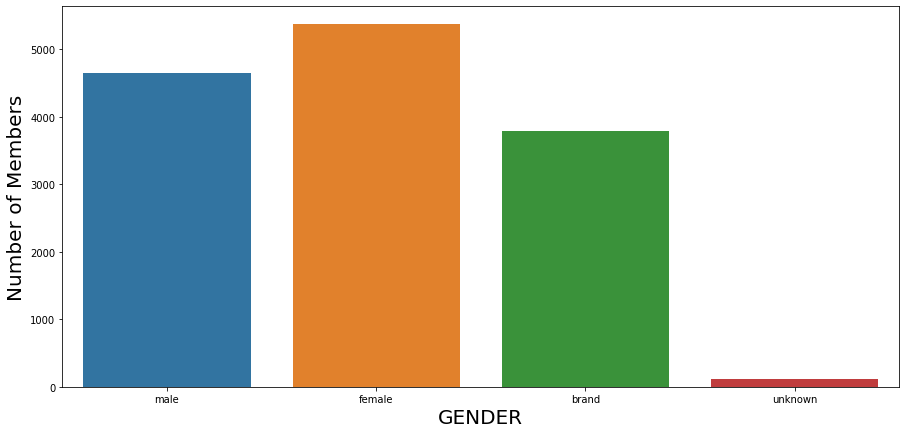

In [24]:
#Graph for gender
plt.figure(figsize=(15,7))
sb.countplot(x='gender',data=df)                       
plt.xlabel("GENDER",fontsize=20)
plt.ylabel("Number of Members",fontsize=20)
#plt.show()

In [16]:
#Finding column with unknown values
df=df[df['gender']!='unknown'] 

In [25]:
import nltk
from nltk.tokenize import sent_tokenize,word_tokenize       # importing nltk library
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer,WordNetLemmatizer
import re

In [26]:
#Finding out stopwords
stopwords=list(stopwords.words('english'))

In [27]:
#cleaning of data-removing symbols,digit,underscore
def clean_data(text):
    text=re.sub("<[^>]*>"," ",text)                     
    text=re.sub("https?://[A-Za-z0-9./]+"," ",text)    
    text=re.sub("@[A-Za-z0-9_]+"," ",text)                        
    text=re.sub("#[A-Za-z0-9_]+"," ",text)               
    text=re.sub("_+"," ",text)                            
    text=re.sub("[^a-zA-z]"," ",text) 
    text=text.lower()                                   
    word_list=word_tokenize(text)
    clean_words=[word for word in word_list if not word in stopwords ]
    text=" ".join(clean_words) 
    return text

In [20]:
df['clean_data_text']=df['text'].apply(lambda x: clean_data(x)) 
df['clean_data_description']=df['description'].apply(lambda x: clean_data(x))

# Final dataset with feature extraction

In [21]:

df

,gender,description,name,text,clean_data_text,clean_data_description
0,male,i sing my own rhythm.,sheezy0,Robbie E Responds To Critics After Win Against...,robbie e responds critics win eddie edwards,sing rhythm
1,male,I'm the author of novels filled with family dr...,DavdBurnett,‰ÛÏIt felt like they were my friends and I was...,felt like friends living story,author novels filled family drama romance
3,male,"Mobile guy. 49ers, Shazam, Google, Kleiner Pe...",douggarland,Hi @JordanSpieth - Looking at the url - do you...,hi looking url use typically see advanced user,mobile guy ers shazam google kleiner perkins y...
4,female,Ricky Wilson The Best FRONTMAN/Kaiser Chiefs T...,WilfordGemma,Watching Neighbours on Sky+ catching up with t...,watching neighbours sky catching neighbs xxx xxx,ricky wilson best frontman kaiser chiefs best ...
5,female,you don't know me.,monroevicious,"Ive seen people on the train with lamps, chair...",ive seen people train lamps chairs tvs etc,know
...,...,...,...,...,...,...
20044,female,I Love Me...Myself....&....I,Bigbootyyjudy_,Need A Ride Home From Practice _Ù÷Ô_Ù÷Ô_Ù÷ÔAnd...,need ride home practice raining hard asf,love
20045,female,(rp),capuletrosa,"@lookupondeath ...Fine, and I'll drink tea too...",fine drink tea love,rp
20046,male,"Whatever you like, it's not a problem at all. ...",BenNight41,Greg Hardy you a good player and all but don't...,greg hardy good player get face dez bryant lea...,whatever like problem
20047,male,#TeamBarcelona ..You look lost so you should f...,realuzzyfluxz,You can miss people and still never want to se...,miss people still never want see,look lost follow follow heart bring brain


# Question - 1 :What are the most common emotions/words used by Males and Females?


In [22]:
#Exctracting only male and female columns
df1=df[(df['gender']=='male') | (df['gender']=='female')]  

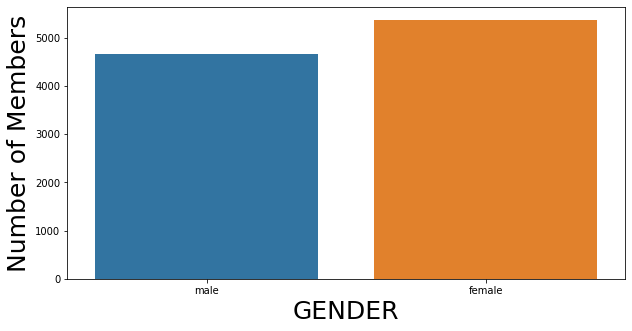

In [23]:
plt.figure(figsize=(10,5))
sb.countplot(x='gender',data=df1)
plt.xlabel("GENDER",fontsize=25)
plt.ylabel("Number of Members",fontsize=25)
plt.show()

In [24]:
df1['gender'].value_counts()

female    5367
male      4653
Name: gender, dtype: int64

In [25]:
#Taking males in one dataframe
male_df=df1[df1['gender']=='male']     
male_df

,gender,description,name,text,clean_data_text,clean_data_description
0,male,i sing my own rhythm.,sheezy0,Robbie E Responds To Critics After Win Against...,robbie e responds critics win eddie edwards,sing rhythm
1,male,I'm the author of novels filled with family dr...,DavdBurnett,‰ÛÏIt felt like they were my friends and I was...,felt like friends living story,author novels filled family drama romance
3,male,"Mobile guy. 49ers, Shazam, Google, Kleiner Pe...",douggarland,Hi @JordanSpieth - Looking at the url - do you...,hi looking url use typically see advanced user,mobile guy ers shazam google kleiner perkins y...
7,male,The secret of getting ahead is getting started.,RobinMeske,Gala Bingo clubs bought for å£241m: The UK's l...,gala bingo clubs bought uk largest high street...,secret getting ahead getting started
17,male,"Over enthusiastic F1 fan. Model collector, mu...",SSmyth2010,@coolyazzy94 Ditto - I'm still learning the fa...,ditto still learning favourites retweet stuff ...,enthusiastic f fan model collector music fan f...
...,...,...,...,...,...,...
20032,male,Amicable IT person. Self indulgent writer. Som...,FauxBen,@legobutts you can do quests and kill stuff wh...,quests kill stuff wearing mask get candy use g...,amicable person self indulgent writer somehow ...
20037,male,"Typographer and typographic consultant, co-fou...",NickSherman,@TrentWalton @oguzbilgic Spell it out in all-c...,spell caps think may candidate new unicode cha...,typographer typographic consultant co founder ...
20043,male,"Head Chef, Chez Bruce. Loves Cars and Bicycles...",MattChristmas1,"Game faggot and venison loin, crisp spelt and ...",game faggot venison loin crisp spelt quince,head chef chez bruce loves cars bicycles food
20046,male,"Whatever you like, it's not a problem at all. ...",BenNight41,Greg Hardy you a good player and all but don't...,greg hardy good player get face dez bryant lea...,whatever like problem


# Most common words by males :

In [26]:
#Counting common word by males
most_common_words_male=[]
msgs=list(male_df['clean_data_text'])              
for msg in msgs: 
    word_tokens=word_tokenize(msg)
    for word in word_tokens:
        most_common_words_male.append(word)

In [27]:
data=pd.Series(most_common_words_male)

In [28]:
count=data.value_counts()
count

like         271
get          259
one          194
time         182
new          165
            ... 
ditches        1
votare         1
lesson         1
coleslaw       1
morecambe      1
Length: 10063, dtype: int64

In [29]:
male_data_frame=pd.DataFrame(count,columns=['Number of Times Occured'])

In [30]:
male_data_frame[:5]

,Number of Times Occured
like,271
get,259
one,194
time,182
new,165


In [31]:
words=list(male_data_frame.index)
noto=list(male_data_frame['Number of Times Occured'])

In [32]:
#Common words by male and its occurances
mw_df=pd.DataFrame({'Word':words,'Occurrence':noto})
mw_df[:10]

,Word,Occurrence
0,like,271
1,get,259
2,one,194
3,time,182
4,new,165
5,go,154
6,people,153
7,love,148
8,got,145
9,good,142


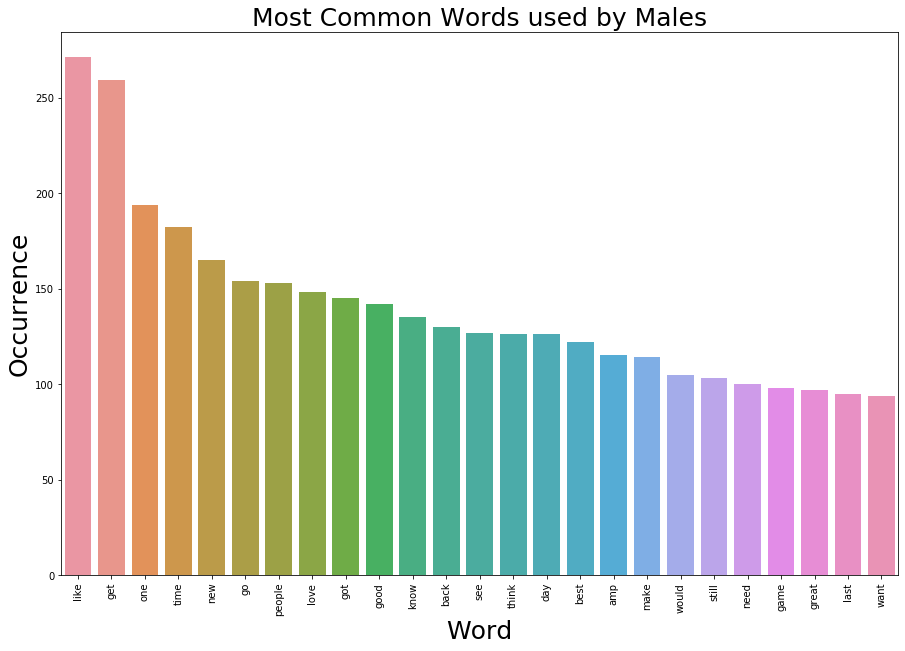

In [33]:
#Plotting graph of most common words by male
plt.figure(figsize=(15,10))                               
x=range(25)
sb.barplot(x=mw_df['Word'].head(25),y=mw_df['Occurrence'].head(25))
plt.xticks(x,mw_df['Word'].head(25),rotation=90)
plt.xlabel('Word',fontsize=25)
plt.ylabel('Occurrence',fontsize=25)
plt.title("Most Common Words used by Males",fontsize=25)
plt.show()

# Finding most common words by females

In [34]:
# Taking all females into one dataframe
female_df=df[df['gender']=='female']    
female_df

,gender,description,name,text,clean_data_text,clean_data_description
4,female,Ricky Wilson The Best FRONTMAN/Kaiser Chiefs T...,WilfordGemma,Watching Neighbours on Sky+ catching up with t...,watching neighbours sky catching neighbs xxx xxx,ricky wilson best frontman kaiser chiefs best ...
5,female,you don't know me.,monroevicious,"Ive seen people on the train with lamps, chair...",ive seen people train lamps chairs tvs etc,know
8,female,Pll Fan // Crazy about MCD // Ramen is bae,pigzilla_,@_Aphmau_ the pic defines all mcd fangirls/fan...,pic defines mcd fangirls fanboys mcd shippers xd,pll fan crazy mcd ramen bae
9,female,"Renaissance art historian, University of Notti...",GabrieleNeher,@Evielady just how lovely is the tree this yea...,lovely tree year never seen gorgeous,renaissance art historian university nottingha...
15,female,None,Ayu7sith4,https://t.co/EROGWTFTYo It's a glow of satisfa...,glow satisfaction glow,none
...,...,...,...,...,...,...
20035,female,25. love my friends & family. the color pink. ...,Cait89lovesTWD,Beetlejuice is the perfect Halloween movie!!!!...,beetlejuice perfect halloween movie,love friends family color pink mkto followed
20039,female,You can find me where the wild things are,KaitlynAmendola,Especially when all you do is the best you can...,especially best still get shit,find wild things
20044,female,I Love Me...Myself....&....I,Bigbootyyjudy_,Need A Ride Home From Practice _Ù÷Ô_Ù÷Ô_Ù÷ÔAnd...,need ride home practice raining hard asf,love
20045,female,(rp),capuletrosa,"@lookupondeath ...Fine, and I'll drink tea too...",fine drink tea love,rp


In [35]:
most_common_words_female=[]
msgs=list(female_df['clean_data_text'])         # calculating most common words by females
for msg in msgs:
    word_tokens=word_tokenize(msg)
    for word in word_tokens:
        most_common_words_female.append(word)

In [36]:
data=pd.Series(most_common_words_female)

In [37]:
count=data.value_counts()

In [38]:
female_data_frame=pd.DataFrame(count,columns=['Number of Times Occured'])

In [39]:
female_data_frame[:5]

,Number of Times Occured
like,358
get,303
one,263
day,254
love,245


In [40]:
words=list(female_data_frame.index)
noto=list(female_data_frame['Number of Times Occured'])

In [41]:
fw_df=pd.DataFrame({'Word':words,'Occurrence':noto})
fw_df[:10]

,Word,Occurrence
0,like,358
1,get,303
2,one,263
3,day,254
4,love,245
5,go,220
6,people,202
7,time,195
8,got,184
9,know,164


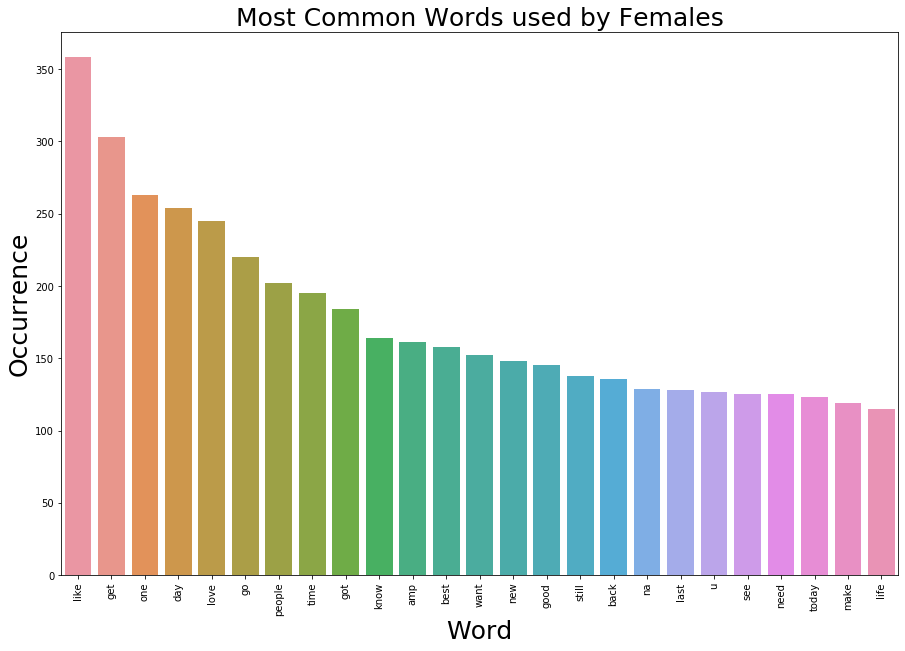

In [42]:
#Plotting most common words by female
plt.figure(figsize=(15,10))
x=range(25)
sb.barplot(x=fw_df['Word'].head(25),y=fw_df['Occurrence'].head(25))
plt.xticks(x,fw_df['Word'].head(25),rotation=90)
plt.xlabel('Word',fontsize=25)
plt.ylabel('Occurrence',fontsize=25)
plt.title("Most Common Words used by Females",fontsize=25)
plt.show()

# Question - 2 :Which gender makes more typos in their tweets?

In [43]:
#Checking for spell mistakes
from spellchecker import SpellChecker
spell=SpellChecker()
male_misspell=spell.unknown(most_common_words_male)
female_misspell=spell.unknown(most_common_words_female)

In [44]:
len(male_misspell)

1569

In [45]:
male_misspell

{'sittwe',
 'onenote',
 'reimagining',
 'assless',
 'rih',
 'mosh',
 'cosplay',
 'fixate',
 'nnamdi',
 'khh',
 'athmosphere',
 'brocker',
 'bullshitting',
 'oakleybike',
 'cuh',
 'yeezus',
 'shii',
 'ughobfzfjy',
 'tengo',
 'culclager',
 'spinnin',
 'breadmanp',
 'dira',
 'skeyt',
 'stelzner',
 'slaydele',
 'ackn',
 'kpono',
 'macbook',
 'anals',
 'bieber',
 'mathtext',
 'fucken',
 'drogba',
 'telkom',
 'mcm',
 'eris',
 'draggin',
 'irsay',
 'dumbest',
 'hace',
 'whitehawk',
 'osheyy',
 'thot',
 'illuminati',
 'obnoxiously',
 'uploading',
 'slackin',
 'dav',
 'mmmh',
 'dsb',
 'gettin',
 'regram',
 'rumor',
 'kenyam',
 'ffc',
 'regionalise',
 'fontes',
 'ingnashov',
 'luxembeourg',
 'awhh',
 'turnin',
 'senatla',
 'moyes',
 'assed',
 'snooki',
 'prioritises',
 'nuc',
 'lgbtq',
 'dbc',
 'tweeted',
 'nailcutters',
 'hillcrest',
 'esports',
 'boko',
 'bluewater',
 'retweets',
 'debilzan',
 'glbe',
 'fournette',
 'kasich',
 'njoy',
 'kanye',
 'adebayor',
 'fud',
 'murdery',
 'wmata',
 'siss

# Number of typos by males : 1569

In [46]:
len(female_misspell)

1670

In [47]:
female_misspell

{'sneaker',
 'sittwe',
 'mosh',
 'alumna',
 'envision',
 'cosplay',
 'plasticbieber',
 'superpoints',
 'condren',
 'shii',
 'fodmap',
 'addgene',
 'fogo',
 'nikes',
 'karlie',
 'skype',
 'gusta',
 'musul',
 'skyler',
 'donuts',
 'justins',
 'renothelpingeither',
 'bieber',
 'mcm',
 'dumbest',
 'ypu',
 'syllabary',
 'nompendulo',
 'thot',
 'zaynnnn',
 'uploading',
 'gettin',
 'rumor',
 'fgs',
 'opao',
 'beb',
 'courfeyrac',
 'dork',
 'kaitlyn',
 'traveled',
 'deffo',
 'blkoutqueen',
 'chickfila',
 'dnce',
 'neuvooretaus',
 'stepmom',
 'dolc',
 'darla',
 'romanticizes',
 'wobegon',
 'otra',
 'cjl',
 'wendys',
 'honoring',
 'fueled',
 'graphicdesignblg',
 'scifi',
 'tweeted',
 'comicon',
 'yupp',
 'tinaspice',
 'boko',
 'possed',
 'foreverrrrr',
 'rebranding',
 'riverdance',
 'http',
 'retweets',
 'strobel',
 'gyft',
 'jaylene',
 'eqanon',
 'seein',
 'milkshakes',
 'lmaoooooooooo',
 'ygod',
 'braunfels',
 'hangout',
 'fanboys',
 'gadhafi',
 'fanduel',
 'poppin',
 'daaaayyyuuuummm',
 'nbd'

# Number of typos by females : 1670

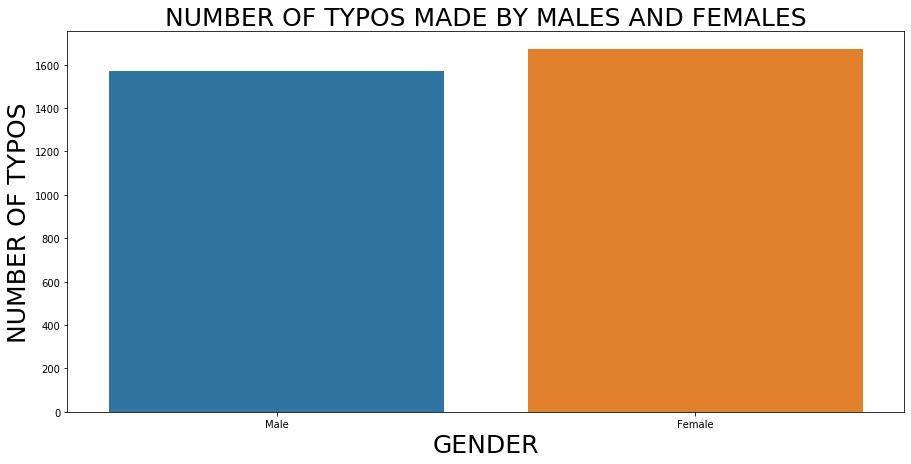

In [48]:
#Plotting spell mistakes by males and females
plt.figure(figsize=(15,7))
Gender=['Male','Female']
Misspell_Count=[len(male_misspell),len(female_misspell)]
sb.barplot(x=Gender,y=Misspell_Count)
plt.xlabel('GENDER',fontsize=25)
plt.ylabel('NUMBER OF TYPOS',fontsize=25)
plt.title('NUMBER OF TYPOS MADE BY MALES AND FEMALES',fontsize=25)
plt.show()

# So from plot it is clear that females made more typos than males

In [49]:
from nltk.corpus import wordnet as wn
nouns = {x.name().split('.', 1)[0] for x in wn.all_synsets('n')}
import wordninja

In [50]:
names=[]
for num in df.name:
    num=re.sub("_"," ",num) 
    num=re.sub("[0-9]+","",num)
    num=num.strip() 
    if num.isupper():
        num=num.lower()
    if len(num.split())>=2:
        if len(num.split(" ")[0])<=2:
            num=num.split(" ")[1]
        else:
            num=num.split(" ")[0]
    if len(num)>=8:
        b=num
        num=wordninja.split(num)[0]
        if len(num)<=2:
            num1=wordninja.split(num)
            for name in num1:
                num=max(num,name)
             
        
    names.append(num)   
df["names"]=names
df.shape[0]

13804

In [51]:
df.names.nunique()

8350

In [52]:
df["name_length"]=df["names"].str.len()
df=df[df.name_length>=2]
df

,gender,description,name,text,clean_data_text,clean_data_description,names,name_length
0,male,i sing my own rhythm.,sheezy0,Robbie E Responds To Critics After Win Against...,robbie e responds critics win eddie edwards,sing rhythm,sheezy,6
1,male,I'm the author of novels filled with family dr...,DavdBurnett,‰ÛÏIt felt like they were my friends and I was...,felt like friends living story,author novels filled family drama romance,Dav,3
3,male,"Mobile guy. 49ers, Shazam, Google, Kleiner Pe...",douggarland,Hi @JordanSpieth - Looking at the url - do you...,hi looking url use typically see advanced user,mobile guy ers shazam google kleiner perkins y...,doug,4
4,female,Ricky Wilson The Best FRONTMAN/Kaiser Chiefs T...,WilfordGemma,Watching Neighbours on Sky+ catching up with t...,watching neighbours sky catching neighbs xxx xxx,ricky wilson best frontman kaiser chiefs best ...,Wilford,7
5,female,you don't know me.,monroevicious,"Ive seen people on the train with lamps, chair...",ive seen people train lamps chairs tvs etc,know,monroe,6
...,...,...,...,...,...,...,...,...
20044,female,I Love Me...Myself....&....I,Bigbootyyjudy_,Need A Ride Home From Practice _Ù÷Ô_Ù÷Ô_Ù÷ÔAnd...,need ride home practice raining hard asf,love,Big,3
20045,female,(rp),capuletrosa,"@lookupondeath ...Fine, and I'll drink tea too...",fine drink tea love,rp,capulet,7
20046,male,"Whatever you like, it's not a problem at all. ...",BenNight41,Greg Hardy you a good player and all but don't...,greg hardy good player get face dez bryant lea...,whatever like problem,Ben,3
20047,male,#TeamBarcelona ..You look lost so you should f...,realuzzyfluxz,You can miss people and still never want to se...,miss people still never want see,look lost follow follow heart bring brain,real,4


In [53]:
df.names.nunique()

8297

In [54]:
import warnings
warnings.filterwarnings('ignore')

In [55]:
df['Total_text_info']=df['names'].str.cat(df['clean_data_description'], sep=' ')

In [63]:
#df['Total_text_info']=df['clean_data_text'].str.cat(df['clean_data_description'], sep=' ')
#df['Total_text_info']=df['Total_text_info'].str.cat(df['names'], sep=' ')


# Lemmatizing the Text

In [64]:
lem=WordNetLemmatizer()

In [65]:
def lemmatizing(text):
    word_tokens=word_tokenize(text)
    lemmatized_words=[lem.lemmatize(word) for word in word_tokens]
    text=' '.join(lemmatized_words)
    return text

In [66]:
df['Lemmatized_Text']=df['Total_text_info'].apply(lambda x: lemmatizing(x))

In [67]:
df.head()

,gender,description,name,text,clean_data_text,clean_data_description,names,name_length,Total_text_info,Lemmatized_Text
0,male,i sing my own rhythm.,sheezy0,Robbie E Responds To Critics After Win Against...,robbie e responds critics win eddie edwards,sing rhythm,sheezy,6,sheezy sing rhythm,sheezy sing rhythm
1,male,I'm the author of novels filled with family dr...,DavdBurnett,‰ÛÏIt felt like they were my friends and I was...,felt like friends living story,author novels filled family drama romance,Dav,3,Dav author novels filled family drama romance,Dav author novel filled family drama romance
3,male,"Mobile guy. 49ers, Shazam, Google, Kleiner Pe...",douggarland,Hi @JordanSpieth - Looking at the url - do you...,hi looking url use typically see advanced user,mobile guy ers shazam google kleiner perkins y...,doug,4,doug mobile guy ers shazam google kleiner perk...,doug mobile guy er shazam google kleiner perki...
4,female,Ricky Wilson The Best FRONTMAN/Kaiser Chiefs T...,WilfordGemma,Watching Neighbours on Sky+ catching up with t...,watching neighbours sky catching neighbs xxx xxx,ricky wilson best frontman kaiser chiefs best ...,Wilford,7,Wilford ricky wilson best frontman kaiser chie...,Wilford ricky wilson best frontman kaiser chie...
5,female,you don't know me.,monroevicious,"Ive seen people on the train with lamps, chair...",ive seen people train lamps chairs tvs etc,know,monroe,6,monroe know,monroe know


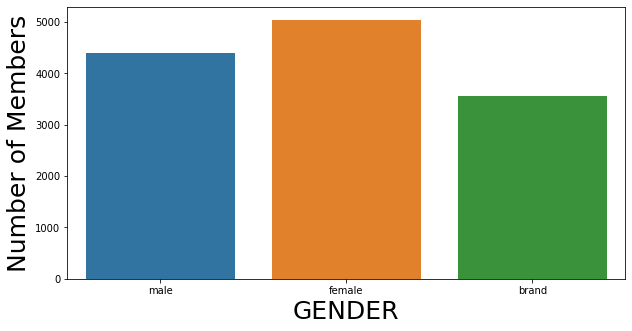

In [68]:
#checking for 3 genders
plt.figure(figsize=(10,5))
sb.countplot(x='gender',data=df)       
plt.xlabel("GENDER",fontsize=25)
plt.ylabel("Number of Members",fontsize=25)
plt.show()

In [92]:
# Encoding depedent variable
from sklearn.preprocessing import LabelEncoder
labelencoder=LabelEncoder()                            
#y=labelencoder.fit_transform(df['gender'])

y=df["gender"]
x=df["Lemmatized_Text"]
df.shape
x

0                                       sheezy sing rhythm
1             Dav author novel filled family drama romance
3        doug mobile guy er shazam google kleiner perki...
4        Wilford ricky wilson best frontman kaiser chie...
5                                              monroe know
                               ...                        
20044                                             Big love
20045                                           capulet rp
20046                            Ben whatever like problem
20047       real look lost follow follow heart bring brain
20049                       Megan teamwork make dream work
Name: Lemmatized_Text, Length: 12993, dtype: object

# Dependent Variable : GENDER 

# Independent Variable : NAME, DESCRIPTION

# Building models


In [93]:
from sklearn.model_selection import train_test_split,cross_val_score
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.1,random_state=0)

In [94]:
#Importing required libraries for algorithms

from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier    
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import make_pipeline

In [95]:
from sklearn import metrics

# 1. LOGISTIC REGRESSION

In [96]:
import warnings
warnings.filterwarnings('ignore')
logreg_model=make_pipeline(TfidfVectorizer(),LogisticRegression())
logreg_model.fit(x_train,y_train)

Pipeline(memory=None,
         steps=[('tfidfvectorizer',
                 TfidfVectorizer(analyzer='word', binary=False,
                                 decode_error='strict',
                                 dtype=<class 'numpy.float64'>,
                                 encoding='utf-8', input='content',
                                 lowercase=True, max_df=1.0, max_features=None,
                                 min_df=1, ngram_range=(1, 1), norm='l2',
                                 preprocessor=None, smooth_idf=True,
                                 stop_words=None, strip_accents=None,
                                 sublinear_tf=False,
                                 token_pattern='(?u)\\b\\w\\w+\\b',
                                 tokenizer=None, use_idf=True,
                                 vocabulary=None)),
                ('logisticregression',
                 LogisticRegression(C=1.0, class_weight=None, dual=False,
                                    fit_intercep

In [97]:
y_pred=logreg_model.predict(x_test)
print('Accuracy of Logistic Regression model is : ',metrics.accuracy_score(y_pred,y_test))
cv_array=cross_val_score(logreg_model,x,y,cv=5)
print('Cross Validation Accuracy Scores : ',cv_array)
print('Overall Accuracy : ',(sum(cv_array))/5)
y_pred

Accuracy of Logistic Regression model is :  0.6846153846153846
Cross Validation Accuracy Scores :  [0.64115385 0.68192308 0.68899153 0.65280985 0.64458991]
Overall Accuracy :  0.6618936440388979


array(['brand', 'female', 'female', ..., 'female', 'brand', 'male'],
      dtype=object)

In [118]:
#using Logistic Algorithmn
#input=["myself mr handsome  , laulit "]
y_pred=logreg_model.predict(["myself mr handsome diva , laulit "])
y_pred

array(['male'], dtype=object)

# 2. NAIVE BAYES

In [119]:
nb_model=make_pipeline(TfidfVectorizer(),MultinomialNB())
nb_model.fit(x_train,y_train)

Pipeline(memory=None,
         steps=[('tfidfvectorizer',
                 TfidfVectorizer(analyzer='word', binary=False,
                                 decode_error='strict',
                                 dtype=<class 'numpy.float64'>,
                                 encoding='utf-8', input='content',
                                 lowercase=True, max_df=1.0, max_features=None,
                                 min_df=1, ngram_range=(1, 1), norm='l2',
                                 preprocessor=None, smooth_idf=True,
                                 stop_words=None, strip_accents=None,
                                 sublinear_tf=False,
                                 token_pattern='(?u)\\b\\w\\w+\\b',
                                 tokenizer=None, use_idf=True,
                                 vocabulary=None)),
                ('multinomialnb',
                 MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True))],
         verbose=False)

In [103]:
y_pred=nb_model.predict(x_test)
print('Accuracy of Naive-Bayes Classifier model is : ',metrics.accuracy_score(y_pred,y_test))
cv_array=cross_val_score(nb_model,x,y,cv=5)
print('Cross Validation Accuracy Scores : ',cv_array)
print('Overall Accuracy : ',(sum(cv_array))/5)


Accuracy of Naive-Bayes Classifier model is :  0.7
Cross Validation Accuracy Scores :  [0.65346154 0.71115385 0.68976135 0.66012317 0.64844051]
Overall Accuracy :  0.6725880838906118


array(['male'], dtype='<U6')

In [124]:
#using naive bayes
#input=["myself mr handsome  , laulit "]
y_pred=nb_model.predict(["myself mr handsome  , laulit "])
y_pred

array(['male'], dtype='<U6')

# 3. SUPPORT VECTOR MACHINE

In [125]:
svm_model=make_pipeline(TfidfVectorizer(),SVC(gamma='scale'))
svm_model.fit(x_train,y_train)

Pipeline(memory=None,
         steps=[('tfidfvectorizer',
                 TfidfVectorizer(analyzer='word', binary=False,
                                 decode_error='strict',
                                 dtype=<class 'numpy.float64'>,
                                 encoding='utf-8', input='content',
                                 lowercase=True, max_df=1.0, max_features=None,
                                 min_df=1, ngram_range=(1, 1), norm='l2',
                                 preprocessor=None, smooth_idf=True,
                                 stop_words=None, strip_accents=None,
                                 sublinear_tf=False,
                                 token_pattern='(?u)\\b\\w\\w+\\b',
                                 tokenizer=None, use_idf=True,
                                 vocabulary=None)),
                ('svc',
                 SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
                     decision_function_shape='ovr', degree=3, g

In [131]:
y_pred=svm_model.predict(x_test)
print('Accuracy of Support Vector Machines model is : ',metrics.accuracy_score(y_pred,y_test))
cv_array=cross_val_score(svm_model,x,y,cv=5)
print('Cross Validation Accuracy Scores : ',cv_array)
print('Overall Accuracy : ',(sum(cv_array))/5)


Accuracy of Support Vector Machines model is :  0.693076923076923
Cross Validation Accuracy Scores :  [0.63538462 0.69730769 0.68321786 0.64549654 0.63303812]
Overall Accuracy :  0.6588889648580081


In [133]:
#using SvM
#input=["myself mr handsome  , laulit "]
y_pred=svm_model.predict(["myself mr handsome  , laulit "])
y_pred

array(['male'], dtype=object)

# 4. DECISION TREE

In [128]:
dectree_model=make_pipeline(TfidfVectorizer(),DecisionTreeClassifier())
dectree_model.fit(x_train,y_train)

Pipeline(memory=None,
         steps=[('tfidfvectorizer',
                 TfidfVectorizer(analyzer='word', binary=False,
                                 decode_error='strict',
                                 dtype=<class 'numpy.float64'>,
                                 encoding='utf-8', input='content',
                                 lowercase=True, max_df=1.0, max_features=None,
                                 min_df=1, ngram_range=(1, 1), norm='l2',
                                 preprocessor=None, smooth_idf=True,
                                 stop_words=None, strip_accents=None,
                                 sublinear_tf=False,
                                 token...
                                 tokenizer=None, use_idf=True,
                                 vocabulary=None)),
                ('decisiontreeclassifier',
                 DecisionTreeClassifier(class_weight=None, criterion='gini',
                                        max_depth=None, max_feature

In [129]:
y_pred=dectree_model.predict(x_test)
print('Accuracy of Decision Tree model is : ',metrics.accuracy_score(y_pred,y_test))
cv_array=cross_val_score(dectree_model,x,y,cv=5)
print('Cross Validation Accuracy Scores : ',cv_array)
print('Overall Accuracy : ',(sum(cv_array))/5)

Accuracy of Decision Tree model is :  0.6184615384615385
Cross Validation Accuracy Scores :  [0.56692308 0.60076923 0.60508083 0.56274057 0.5606469 ]
Overall Accuracy :  0.5792321218079204


In [130]:
#using Decision Tree
#input=["myself mr handsome  , laulit "]
y_pred=dectree_model.predict(["myself mr handsome  , laulit "])
y_pred

array(['male'], dtype=object)

# 5. RANDOM FOREST

In [110]:
rf_model=make_pipeline(TfidfVectorizer(),RandomForestClassifier())
rf_model.fit(x_train,y_train)

Pipeline(memory=None,
         steps=[('tfidfvectorizer',
                 TfidfVectorizer(analyzer='word', binary=False,
                                 decode_error='strict',
                                 dtype=<class 'numpy.float64'>,
                                 encoding='utf-8', input='content',
                                 lowercase=True, max_df=1.0, max_features=None,
                                 min_df=1, ngram_range=(1, 1), norm='l2',
                                 preprocessor=None, smooth_idf=True,
                                 stop_words=None, strip_accents=None,
                                 sublinear_tf=False,
                                 token...
                 RandomForestClassifier(bootstrap=True, class_weight=None,
                                        criterion='gini', max_depth=None,
                                        max_features='auto',
                                        max_leaf_nodes=None,
                               

In [111]:
y_pred=rf_model.predict(x_test)
print('Accuracy of Random Forest model is : ',metrics.accuracy_score(y_pred,y_test))
cv_array=cross_val_score(rf_model,x,y,cv=5)
print('Cross Validation Accuracy Scores : ',cv_array)
print('Overall Accuracy : ',(sum(cv_array))/5)

Accuracy of Random Forest model is :  0.6338461538461538
Cross Validation Accuracy Scores :  [0.59038462 0.64115385 0.6274057  0.58198614 0.57219869]
Overall Accuracy :  0.6026257984424727


In [112]:
#using Random Forest
#input=["myself mr handsome  , laulit "]
y_pred=rf_model.predict(["myself mr handsome  , laulit "])
y_pred

array(['male'], dtype=object)

# 6. K-NEAREST NEIGHBORS

In [113]:
knn_model=make_pipeline(TfidfVectorizer(),KNeighborsClassifier())
knn_model.fit(x_train,y_train)

Pipeline(memory=None,
         steps=[('tfidfvectorizer',
                 TfidfVectorizer(analyzer='word', binary=False,
                                 decode_error='strict',
                                 dtype=<class 'numpy.float64'>,
                                 encoding='utf-8', input='content',
                                 lowercase=True, max_df=1.0, max_features=None,
                                 min_df=1, ngram_range=(1, 1), norm='l2',
                                 preprocessor=None, smooth_idf=True,
                                 stop_words=None, strip_accents=None,
                                 sublinear_tf=False,
                                 token_pattern='(?u)\\b\\w\\w+\\b',
                                 tokenizer=None, use_idf=True,
                                 vocabulary=None)),
                ('kneighborsclassifier',
                 KNeighborsClassifier(algorithm='auto', leaf_size=30,
                                      metric='mink

In [114]:
y_pred=knn_model.predict(x_test)
print('Accuracy of K-Nearest Neighbors model is : ',metrics.accuracy_score(y_pred,y_test))
cv_array=cross_val_score(knn_model,x,y,cv=5)
print('Cross Validation Accuracy Scores : ',cv_array)
print('Overall Accuracy : ',(sum(cv_array))/5)

Accuracy of K-Nearest Neighbors model is :  0.57
Cross Validation Accuracy Scores :  [0.55153846 0.58653846 0.58083141 0.54618938 0.53446284]
Overall Accuracy :  0.5599121100073585


In [115]:
#using K- nearest
#input=["myself mr handsome  , laulit "]
y_pred=knn_model.predict(["myself mr handsome  , laulit "])
y_pred

array(['male'], dtype=object)

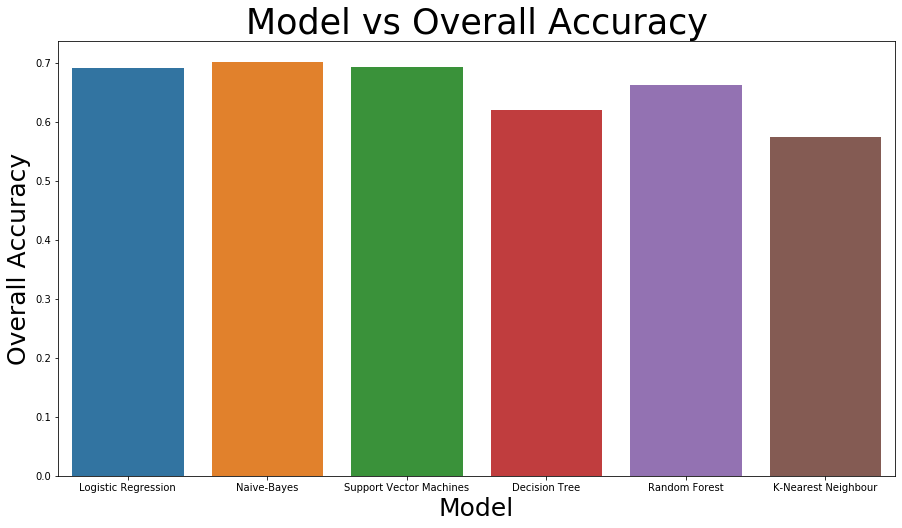

In [90]:
overall_accuracies=[.6907692307692308,.7023076923076923, 0.693076923076923,0.6207692307692307, 0.6630769230769231,0.5745376101011196]
models=['Logistic Regression','Naive-Bayes','Support Vector Machines','Decision Tree','Random Forest','K-Nearest Neighbour']
plt.figure(figsize=(15,8))
sb.barplot(x=models,y=overall_accuracies)
plt.xlabel('Model',fontsize=25)
plt.ylabel('Overall Accuracy',fontsize=25)
plt.title('Model vs Overall Accuracy',fontsize=35)
plt.show()

# From the above figure, we can see that LOGISTIC REGRESSION , Naive Bayes & SVM  models have greater accuracy than other models of ~70%.

# ENSEMBLING LOGISTIC REGRESSION, SUPPORT VECTOR MACHINES & NAIVE-BAYES

In [116]:
from sklearn.ensemble import VotingClassifier
ensemble_model=VotingClassifier(estimators=[('Logistic Regression',logreg_model),("Support Vector Machine",svm_model),("Naive Bayes",nb_model)],voting='hard') 
ensemble_model.fit(x_train,y_train)
y_pred=ensemble_model.predict(x_test)
ensemble_accuracy=metrics.accuracy_score(y_test,y_pred)

In [117]:
ensemble_accuracy*=100
print('Accuracy of Ensembling model is ','%.2f'%ensemble_accuracy)

Accuracy of Ensembling model is  69.54


# Accuracy of Ensembling Model is 69.46 %

In [89]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

In [90]:
print("Confusion Matrix\n",confusion_matrix(y_test,y_pred))

Confusion Matrix
 [[287  56  45]
 [ 38 363  81]
 [ 42 134 254]]


In [91]:
print("Classification Report\n",classification_report(y_test,y_pred))

Classification Report
               precision    recall  f1-score   support

           0       0.78      0.74      0.76       388
           1       0.66      0.75      0.70       482
           2       0.67      0.59      0.63       430

    accuracy                           0.70      1300
   macro avg       0.70      0.69      0.70      1300
weighted avg       0.70      0.70      0.69      1300

